java -jar compbio-conservation-1.1.jar -n -g='-,~,.,*, ,'  -m=KABAT,SMERFS,VALDAR -i=input.aln  -o=conservation.txt

In [1]:
from Bio import SearchIO
from collections import defaultdict
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import IUPAC
import subprocess as sp
import os
import ntpath as path

In [2]:
def amino_acid_type(aa):
    if aa == 'H' or aa == 'K' or aa == 'R':
        return "positive"
    if aa == 'D' or aa == 'E':
        return "negative"
    if aa == 'S' or aa == 'T' or aa == 'N' or aa == 'Q':
        return "neutral"
    if aa == 'A' or aa == 'V' or aa == 'L' or aa == 'I' or aa == 'M':
        return "aliphatic"
    if aa == 'F' or aa == 'Y' or aa == 'W':
        return "aromatic"
    if aa == 'P' or aa == 'G' :
        return "Pro&Gly"
    if aa == 'C':
        return "cysteine"

In [3]:
def read_conservation_scores(VERBOSE, OUTPUT_CONSERVATION_FILE):
    method_consrv_score = defaultdict(list)

    with open (OUTPUT_CONSERVATION_FILE, "r") as myfile:
        data = myfile.readlines()
        for line in data:
            if line.startswith("#"):
                words = line.split()
                if VERBOSE == True:
                    print('Scoring Methods: {}'.format(words[0]))
                method_consrv_score[words[0]]= words[1:len(words)]
    return method_consrv_score

In [4]:
def is_amino_acid_in_domain(position):
    "This function will return the domain name if found at a given position"
    domains = set()
    for k, v in domain_dict.items():
            #print (start, end)
        if position >= v['start'] and position <= v['end']:
            domains.add(k)
    return domains

In [5]:
from Bio import SeqIO

def write_final_solution(SOLUTION_AA_CONSERV_FILE, aligned_out_file, align_file_format="clustal"):
    file = open(SOLUTION_AA_CONSERV_FILE,"w")

    COMMENT="#----------------------------------------------------------------------#"
    file.write(COMMENT)
    file.write("\n")
    Author="# Author: Syed Asad Rahman, e-mail: asad@ebi.ac.uk"
    file.write(Author)
    file.write("\n")
    file.write("\n")
    header="# \"Alignment Position\"\t\"Animo Acid Index\"\t\"AA\"\t\"Score\"\t\"AA-Type\"\t\"Domain\""
    file.write(header)
    file.write("\n")

    data_map={}
    for seq_record in SeqIO.parse(aligned_out_file, align_file_format):
        query_align_amino_acid = list(seq_record)
        print('Seq: {}'.format(seq_record.id) )
        counter=1
        VALDAR_score = method_consrv_score["#VALDAR"]
        KABAT_score = method_consrv_score["#KABAT"]
        for index, aa in enumerate (query_align_amino_acid, start=0):
            if aa != '-':
                combine_score = ((float(VALDAR_score[index])) + (float(KABAT_score[index])))/ 2.0
                domain = is_amino_acid_in_domain(counter)
                aa_type = amino_acid_type (aa)
                if len(domain)==0:
                    domain="NA"
#                 print ("Alignment=%d, SeqIndex=%d, Amino_Acid=%s, Score=%.2f, domain=%s " % ((index+1), counter, aa, combine_score, domain))
                file.write("%d\t%d\t%s\t%.2f\t%s\t%s" % ((index+1), counter, aa, combine_score, aa_type, domain))
                file.write("\n")
                key=counter
                if key not in data_map.keys():
                    d_flag= 0 if domain=="NA" else len(domain)
                    data_map[key]={'aa':aa,'score':combine_score,'domain':d_flag}
                counter+=1
                
        break;

    file.close() 
    return data_map

In [6]:
# ## Plot Scores

# In[ ]:

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np

def plot(data_map, image_file):
    index = list(x for x in data_map.keys())
    aa = list(x['aa'] for x in data_map.values())
    score = list(x['score'] for x  in data_map.values())
    domain = list(x['domain'] for x  in data_map.values())
    
#     print(index)
#     print(domain)
     
    
    axes = plt.plot(index, score, label="AA-Con")
    plt.plot(index, domain, label="Domain-Region")
#     plt.xticks(index, aa, rotation=45, fontsize=8)
    plt.tick_params(which = 'both', direction = 'out')
    
    plt.xlim(min(index), max(index))
   
    
    plt.xlabel('aa(s) position')
    plt.ylabel('Score (0:min, 1:max)')
    plt.title('Amino Acid Conservation Score')
    plt.grid(True)
    #create legend
    plt.legend(loc="upper left")
    
    plt.savefig(image_file)
    plt.show()

Scoring Methods: #KABAT
Scoring Methods: #VALDAR
Scoring Methods: #SMERFS
Seq: BetaCoV_Wuhan


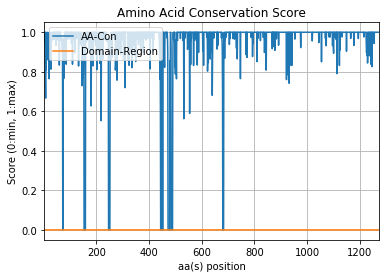

In [7]:
VERBOSE=True
domain_dict={}
aligned_out_file='/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/ADE34790-Wuhan.aln'
OUTPUT_CONSERVATION_FILE = '/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/ADE34790-Wuhan_Conservation.txt'
SOLUTION_AA_CONSERV_FILE = '/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/ADE34790-Wuhan_Conservation.out'
PLOT_FILE = '/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/ADE34790-Wuhan_Conservation'
method_consrv_score=read_conservation_scores(VERBOSE, OUTPUT_CONSERVATION_FILE)
data_map=write_final_solution(SOLUTION_AA_CONSERV_FILE, aligned_out_file, align_file_format="clustal")
IMAGE_FILE_NAME=('{}.png').format(path.basename(PLOT_FILE).split('.')[0])
plot(data_map, IMAGE_FILE_NAME)

Scoring Methods: #KABAT
Scoring Methods: #VALDAR
Scoring Methods: #SMERFS
Seq: QHA24703.1


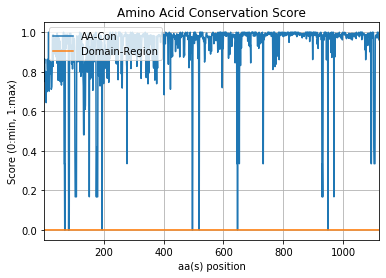

In [8]:
VERBOSE=True
domain_dict={}
aligned_out_file='/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/AGC74176-Wuhan.aln'
OUTPUT_CONSERVATION_FILE = '/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/AGC74176-Wuhan_Conservation.txt'
SOLUTION_AA_CONSERV_FILE = '/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/AGC74176-Wuhan_Conservation.out'
PLOT_FILE = '/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/AGC74176-Wuhan_Conservation'
method_consrv_score=read_conservation_scores(VERBOSE, OUTPUT_CONSERVATION_FILE)
data_map=write_final_solution(SOLUTION_AA_CONSERV_FILE, aligned_out_file, align_file_format="clustal")
IMAGE_FILE_NAME=('{}.png').format(path.basename(PLOT_FILE).split('.')[0])
plot(data_map, IMAGE_FILE_NAME)

Scoring Methods: #KABAT
Scoring Methods: #VALDAR
Scoring Methods: #SMERFS
Seq: lcl|Query_41685:21540-25343


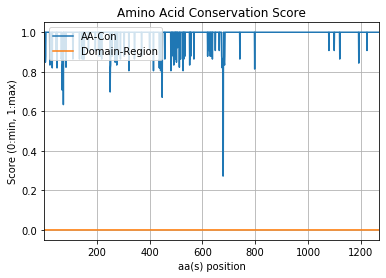

In [9]:
VERBOSE=True
domain_dict={}
aligned_out_file='/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/Pangolin-Wuhan.aln'
OUTPUT_CONSERVATION_FILE = '/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/Pangolin-Wuhan_Conservation.txt'
SOLUTION_AA_CONSERV_FILE = '/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/Pangolin-Wuhan_Conservation.out'
PLOT_FILE = '/Users/asad/Desktop/BioInception/JH/IIT/publication/figs/spike/Pangolin-Wuhan_Conservation'
method_consrv_score=read_conservation_scores(VERBOSE, OUTPUT_CONSERVATION_FILE)
data_map=write_final_solution(SOLUTION_AA_CONSERV_FILE, aligned_out_file, align_file_format="clustal")
IMAGE_FILE_NAME=('{}.png').format(path.basename(PLOT_FILE).split('.')[0])
plot(data_map, IMAGE_FILE_NAME)